# Installing required libraries

In [13]:
pip install imbalanced-learn

     |████████████████████████████████| 257 kB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 11.1 MB 126.6 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install seaborn

     |████████████████████████████████| 294 kB 5.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install keras-vis

     |████████████████████████████████| 13.9 MB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 99.2 MB/s eta 0:00:01
     |████████████████████████████████| 313 kB 111.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 76.4 MB/s eta 0:00:01
     |████████████████████████████████| 220 kB 114.1 MB/s eta 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
Note: you may need to restart the kernel to use updated packages.


# Download the dataset

In [1]:
# Download datasets
!wget https://dl.cv.ethz.ch/bdd100k/data/100k_images_train.zip # train
!wget https://dl.cv.ethz.ch/bdd100k/data/100k_images_val.zip # val
!wget https://dl.cv.ethz.ch/bdd100k/data/100k_images_test.zip # test

# Download JSON files
!wget https://dl.cv.ethz.ch/bdd100k/data/bdd100k_det_20_labels_trainval.zip # train+val


--2024-03-24 13:48:52--  https://dl.cv.ethz.ch/bdd100k/data/100k_images_train.zip
Resolving dl.cv.ethz.ch (dl.cv.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to dl.cv.ethz.ch (dl.cv.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974621061 (3.7G) [application/zip]
Saving to: ‘100k_images_train.zip’

100k_images_train.z 100%[===================>]   3.70G  24.5MB/s    in 2m 40s  

2024-03-24 13:51:32 (23.8 MB/s) - ‘100k_images_train.zip’ saved [3974621061/3974621061]

--2024-03-24 13:51:32--  https://dl.cv.ethz.ch/bdd100k/data/100k_images_val.zip
Resolving dl.cv.ethz.ch (dl.cv.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to dl.cv.ethz.ch (dl.cv.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 568295173 (542M) [application/zip]
Saving to: ‘100k_images_val.zip’

100k_images_val.zip 100%[===================>] 541.97M  24.2MB/s    in 24s     

2024-03-24 13:

In [6]:
import zipfile

# Define function to unzip files
def unzip_file(zip_file):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall()

# Suppress output with semicolon
unzip_file("100k_images_test.zip"); 
unzip_file("100k_images_train.zip"); 
unzip_file("100k_images_val.zip"); 
unzip_file("bdd100k_det_20_labels_trainval.zip"); 


# Extracting labels

In [14]:
import json

train_image_path = "bdd100k/images/100k/train/"
val_image_path = "bdd100k/images/100k/val/"

# Function to extract weather attribute from JSON data
def extract_weather(json_file, image_path):
    with open(json_file, 'r') as f:
        data = json.load(f)
        weather_data = [(image_path + entry['name'], entry['attributes']['weather']) for entry in data if entry['attributes']['timeofday'] != 'night']

    return weather_data

# Paths to JSON files
train_json_file = 'bdd100k/labels/det_20/det_train.json'
val_json_file = 'bdd100k/labels/det_20/det_val.json'

# Extract weather attributes from train and val JSON files
train_weather_data = extract_weather(train_json_file, train_image_path)
val_weather_data = extract_weather(val_json_file, val_image_path)

# Example output
print("Train data:")
print(train_weather_data[:5])  # Print first 5 entries
print("Validation data:")
print(val_weather_data[:5])    # Print first 5 entries


Train data:
[('bdd100k/images/100k/train/0000f77c-6257be58.jpg', 'clear'), ('bdd100k/images/100k/train/0000f77c-62c2a288.jpg', 'clear'), ('bdd100k/images/100k/train/0000f77c-cb820c98.jpg', 'clear'), ('bdd100k/images/100k/train/00054602-3bf57337.jpg', 'clear'), ('bdd100k/images/100k/train/00067cfb-5443fe39.jpg', 'clear')]
Validation data:
[('bdd100k/images/100k/val/b1c66a42-6f7d68ca.jpg', 'overcast'), ('bdd100k/images/100k/val/b1c9c847-3bda4659.jpg', 'undefined'), ('bdd100k/images/100k/val/b1cac6a7-04e33135.jpg', 'rainy'), ('bdd100k/images/100k/val/b1cd1e94-549d0bfe.jpg', 'undefined'), ('bdd100k/images/100k/val/b1ceb32e-51852abe.jpg', 'clear')]


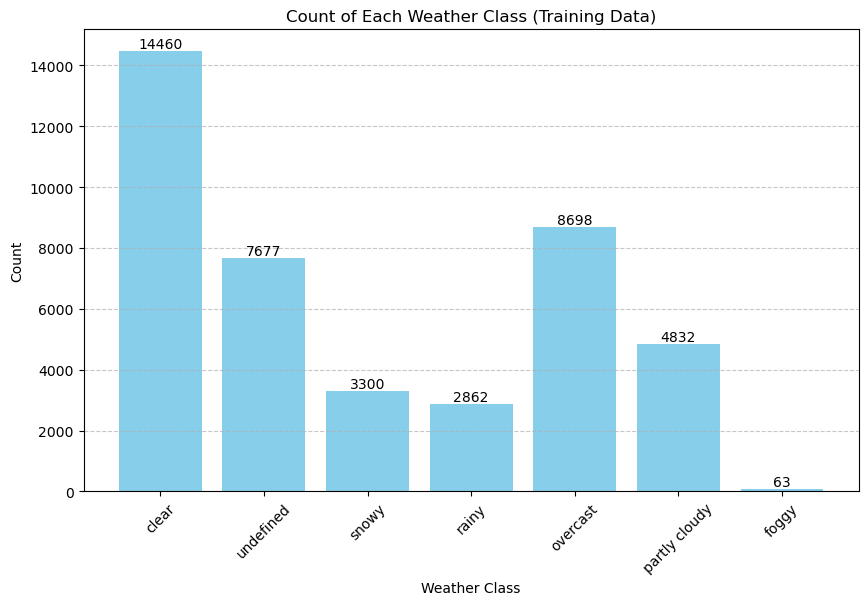

Number of weather classes in training data: 7


In [15]:
import matplotlib.pyplot as plt
from collections import Counter



# Extract weather classes from train data
weather_classes_train = [weather for _, weather in train_weather_data]

# Count the occurrences of each weather class in train data
class_counts_train = Counter(weather_classes_train)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts_train.keys(), class_counts_train.values(), color='skyblue')

# Add counts above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.xlabel('Weather Class')
plt.ylabel('Count')
plt.title('Count of Each Weather Class (Training Data)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display number of classes in train data
num_classes_train = len(class_counts_train)
print("Number of weather classes in training data:", num_classes_train)


# Training CNN model on the whole dataset and convert the trained model with weights to a frozen model

In [18]:
# Import the necessary libraries
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, callbacks
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD

# Define image dimensions
target_height, target_width = 224, 224  # Update dimensions as per your requirement

# Define batch size
batch_size = 32

# Assuming you have defined `train_weather_data` somewhere above
train_weather_data = [(image_path, weather) for image_path, weather in train_weather_data if weather != "undefined"]

# Extract image paths and labels from train_weather_data
image_paths = [data[0] for data in train_weather_data]
labels = [data[1] for data in train_weather_data]

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Calculate the number of classes (unique labels)
num_classes = len(np.unique(labels_encoded))

# One-hot encode the labels
one_hot_encoder = OneHotEncoder(sparse=False)
labels_one_hot = one_hot_encoder.fit_transform(labels_encoded.reshape(-1, 1))

# Split data into training and validation sets
train_image_paths, val_image_paths, train_labels, val_labels = train_test_split(
    image_paths, labels_one_hot, test_size=0.2, random_state=42)

# Create a custom data generator class
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_paths, labels, batch_size, target_height, target_width, shuffle=True):
        self.image_paths = image_paths
        self.labels = labels
        self.batch_size = batch_size
        self.target_height = target_height
        self.target_width = target_width
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.image_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_image_paths = [self.image_paths[i] for i in batch_indexes]
        batch_labels = [self.labels[i] for i in batch_indexes]
        X, y = self.__data_generation(batch_image_paths, batch_labels)
        return X, y

    def __data_generation(self, batch_image_paths, batch_labels):
        X = np.empty((len(batch_image_paths), self.target_height, self.target_width, 3))
        y = np.empty((len(batch_image_paths), num_classes), dtype=int)
        for i, (image_path, label) in enumerate(zip(batch_image_paths, batch_labels)):
            # Load image and resize
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(self.target_height, self.target_width))
            # Convert to array
            image = tf.keras.preprocessing.image.img_to_array(image)
            X[i] = image / 255.0  # Normalize pixel values
            y[i] = label
        return X, y

# Create train and validation generators
train_generator = DataGenerator(train_image_paths, train_labels, batch_size, target_height, target_width, shuffle=True)
validation_generator = DataGenerator(val_image_paths, val_labels, batch_size, target_height, target_width, shuffle=False)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(target_height, target_width, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model with categorical crossentropy loss
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define a callback to print training progress
class PrintProgress(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch+1}/{self.params['epochs']}, "
              f"loss: {logs['loss']:.4f}, "
              f"accuracy: {logs['accuracy']:.4f}, "
              f"val_loss: {logs['val_loss']:.4f}, "
              f"val_accuracy: {logs['val_accuracy']:.4f}")

# Define EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_CNN.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[PrintProgress(), early_stopping, model_checkpoint])

/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
856/856 [==============================] - 326s 368ms/step - loss: 1.5222 - accuracy: 0.4196 - val_loss: 1.4542 - val_accuracy: 0.4187

Epoch 1/10, loss: 1.4612, accuracy: 0.4235, val_loss: 1.4542, val_accuracy: 0.4187
Epoch 2/10
856/856 [==============================] - 308s 360ms/step - loss: 1.4425 - accuracy: 0.4174 - val_loss: 1.4493 - val_accuracy: 0.4187

Epoch 2/10, loss: 1.4334, accuracy: 0.4236, val_loss: 1.4493, val_accuracy: 0.4187
Epoch 3/10
856/856 [==============================] - 308s 360ms/step - loss: 1.4246 - accuracy: 0.4299 - val_loss: 1.4494 - val_accuracy: 0.4187

Epoch 3/10, loss: 1.4315, accuracy: 0.4236, val_loss: 1.4494, val_accuracy: 0.4187
Epoch 4/10
856/856 [==============================] - 309s 361ms/step - loss: 1.4339 - accuracy: 0.4207 - val_loss: 1.4502 - val_accuracy: 0.4187

Epoch 4/10, loss: 1.4308, accuracy: 0.4236, val_loss: 1.4502, val_accuracy: 0.4187
Epoch 5/10
856/856 [==============================] - 308s 360ms/step - loss: 1.

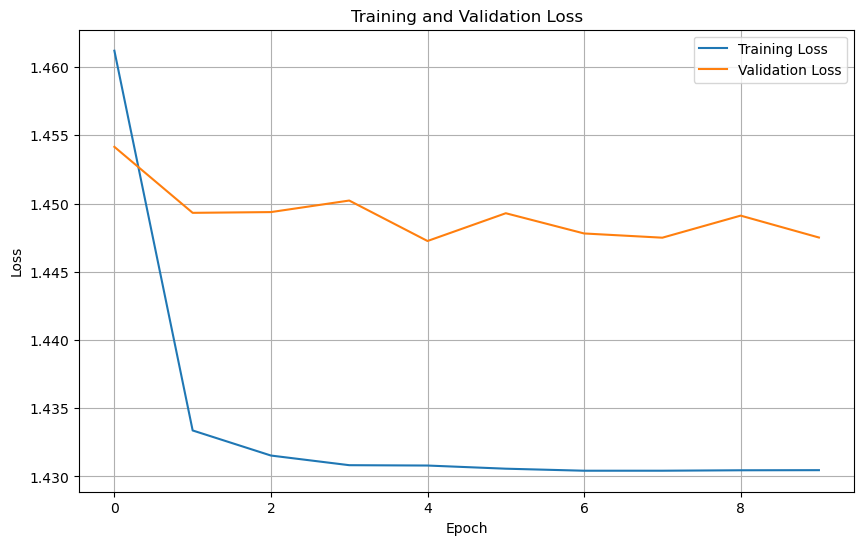

In [19]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
import tensorflow as tf
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

# Assuming 'model' is your trained TensorFlow model
# Define a function to export the model to a .pb file
def save_frozen_model(model, model_path):
    # Convert Keras model to ConcreteFunction
    full_model = tf.function(lambda x: model(x))
    concrete_function = full_model.get_concrete_function(tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

    # Convert variables to constants inside the TensorFlow graph
    frozen_func = convert_variables_to_constants_v2(concrete_function)

    # Save the frozen graph to a .pb file
    tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                      logdir="./",
                      name=model_path,
                      as_text=False)

# Save the model as a frozen graph (.pb file)
save_frozen_model(model, "frozen_model_CNN_ALL.pb")


2024-03-27 03:52:30.157664: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-27 03:52:30.157814: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2024-03-27 03:52:30.157905: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2024-03-27 03:52:30.158230: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-27 03:52:30.158319: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: GRID A100X-20C computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 20.00GiB deviceMemoryBandwidth: 1.41TiB/s
2024-03-27 03:52:30.158370: I t

# Using UpSampler and DownSampler to balance the dataset

Class: clear, Count: 877
Class: foggy, Count: 263
Class: overcast, Count: 877
Class: partly cloudy, Count: 488
Class: rainy, Count: 507
Class: snowy, Count: 554


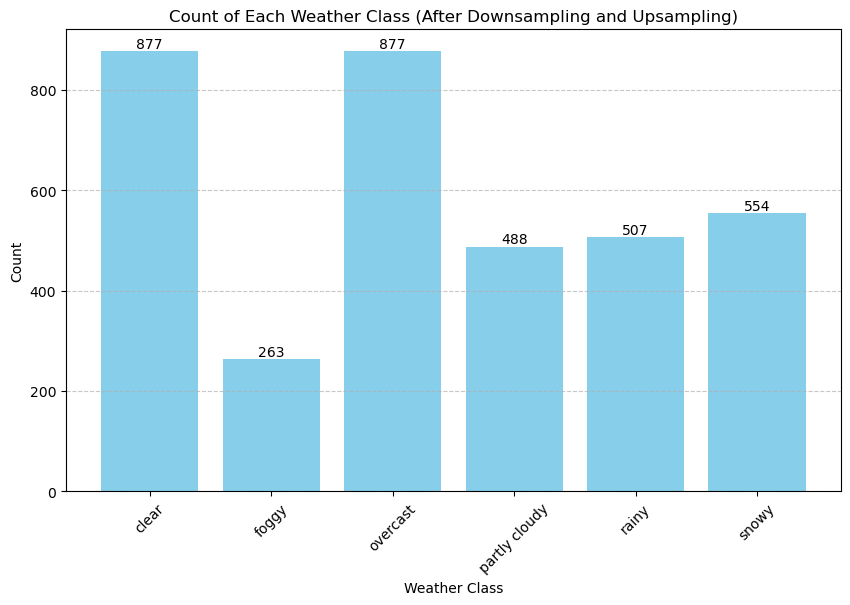

In [18]:
import random
from collections import Counter

# Define the desired number of samples for each class
desired_samples_per_class = {
    'clear': 877, # 877
    'foggy': 200, # 130
    'overcast': 877, # 877
    'partly cloudy': 488, # 488
    'rainy': 507, # 507
    'snowy': 554 # 554
}

# Initialize an empty list to store downsampled data
train_weather_data_downsampled = []

# Downsample each class individually
for label, desired_samples in desired_samples_per_class.items():
    # Filter out samples belonging to the current class
    class_samples = [(image_path, label) for image_path, l in train_weather_data if l == label]
    
    # If the class has more samples than the desired number, randomly select a subset
    if len(class_samples) > desired_samples:
        downsampled_samples = random.sample(class_samples, desired_samples)
    else:
        downsampled_samples = class_samples
    
    # Append the downsampled samples to the list
    train_weather_data_downsampled.extend(downsampled_samples)

# Upsample the "foggy" class to match the desired number of samples
foggy_samples = [(image_path, label) for image_path, label in train_weather_data_downsampled if label == 'foggy']
while len(foggy_samples) < desired_samples_per_class['foggy']:
    # Randomly select a foggy sample to duplicate
    sample_to_duplicate = random.choice(foggy_samples)
    foggy_samples.append(sample_to_duplicate)

# Append the upsampled foggy samples to the downsampled data
train_weather_data_downsampled.extend(foggy_samples)

# Count the occurrences of each class in the downsampled dataset
class_counts_downsampled = Counter(label for _, label in train_weather_data_downsampled)

# Print the count of each class
for label, count in class_counts_downsampled.items():
    print(f"Class: {label}, Count: {count}")

# Extract labels and counts
labels = list(class_counts_downsampled.keys())
counts = list(class_counts_downsampled.values())

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color='skyblue')

# Add counts above bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(count), ha='center', va='bottom')

plt.xlabel('Weather Class')
plt.ylabel('Count')
plt.title('Count of Each Weather Class (After Downsampling and Upsampling)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Training CNN model on the balanced dataset and convert the trained model with weights to a frozen model

In [11]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, callbacks
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define image dimensions
target_height, target_width = 224, 224  # Update dimensions as per your requirement

# Define batch size
batch_size = 32

# Extract image paths and labels from train_weather_data_downsampled
image_paths = [data[0] for data in train_weather_data_downsampled]
labels = [data[1] for data in train_weather_data_downsampled]

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Calculate the number of classes (unique labels)
num_classes = len(np.unique(labels_encoded))

# Split data into training and validation sets
train_image_paths, val_image_paths, train_labels, val_labels = train_test_split(
    image_paths, labels_encoded, test_size=0.2, random_state=42)

# Create a custom data generator class
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_paths, labels, batch_size, target_height, target_width, shuffle=True):
        self.image_paths = image_paths
        self.labels = labels
        self.batch_size = batch_size
        self.target_height = target_height
        self.target_width = target_width
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.image_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_image_paths = [self.image_paths[i] for i in batch_indexes]
        batch_labels = [self.labels[i] for i in batch_indexes]
        X, y = self.__data_generation(batch_image_paths, batch_labels)
        return X, y

    def __data_generation(self, batch_image_paths, batch_labels):
        X = np.empty((len(batch_image_paths), self.target_height, self.target_width, 3))
        y = np.empty((len(batch_image_paths)), dtype=int)
        for i, (image_path, label) in enumerate(zip(batch_image_paths, batch_labels)):
            # Load image and resize
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(self.target_height, self.target_width))
            # Convert to array
            image = tf.keras.preprocessing.image.img_to_array(image)
            X[i] = image / 255.0  # Normalize pixel values
            y[i] = label
        return X, y

# Create train and validation generators
train_generator = DataGenerator(train_image_paths, train_labels, batch_size, target_height, target_width)
validation_generator = DataGenerator(val_image_paths, val_labels, batch_size, target_height, target_width)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(target_height, target_width, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define a callback to print training progress
class PrintProgress(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch+1}/{self.params['epochs']}, "
              f"loss: {logs['loss']:.4f}, "
              f"accuracy: {logs['accuracy']:.4f}, "
              f"val_loss: {logs['val_loss']:.4f}, "
              f"val_accuracy: {logs['val_accuracy']:.4f}")

# Define the ReduceLROnPlateau callback
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-10)

# Define EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_CNN.h5', monitor='val_loss', save_best_only=True)


# Train the model with learning rate scheduling
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[PrintProgress(), early_stopping, model_checkpoint])

Epoch 1/10
85/85 [==============================] - 32s 366ms/step - loss: 3.3929 - accuracy: 0.2497 - val_loss: 2.5891 - val_accuracy: 0.2953

Epoch 1/10, loss: 2.9956, accuracy: 0.2463, val_loss: 2.5891, val_accuracy: 0.2953
Epoch 2/10
85/85 [==============================] - 30s 359ms/step - loss: 2.5242 - accuracy: 0.2561 - val_loss: 2.3533 - val_accuracy: 0.2389

Epoch 2/10, loss: 2.4659, accuracy: 0.2474, val_loss: 2.3533, val_accuracy: 0.2389
Epoch 3/10
85/85 [==============================] - 30s 358ms/step - loss: 2.3075 - accuracy: 0.2681 - val_loss: 2.1830 - val_accuracy: 0.2938

Epoch 3/10, loss: 2.2660, accuracy: 0.2559, val_loss: 2.1830, val_accuracy: 0.2938
Epoch 4/10
85/85 [==============================] - 30s 359ms/step - loss: 2.1503 - accuracy: 0.2557 - val_loss: 2.0594 - val_accuracy: 0.2478

Epoch 4/10, loss: 2.1195, accuracy: 0.2526, val_loss: 2.0594, val_accuracy: 0.2478
Epoch 5/10
85/85 [==============================] - 30s 357ms/step - loss: 2.0362 - accuracy

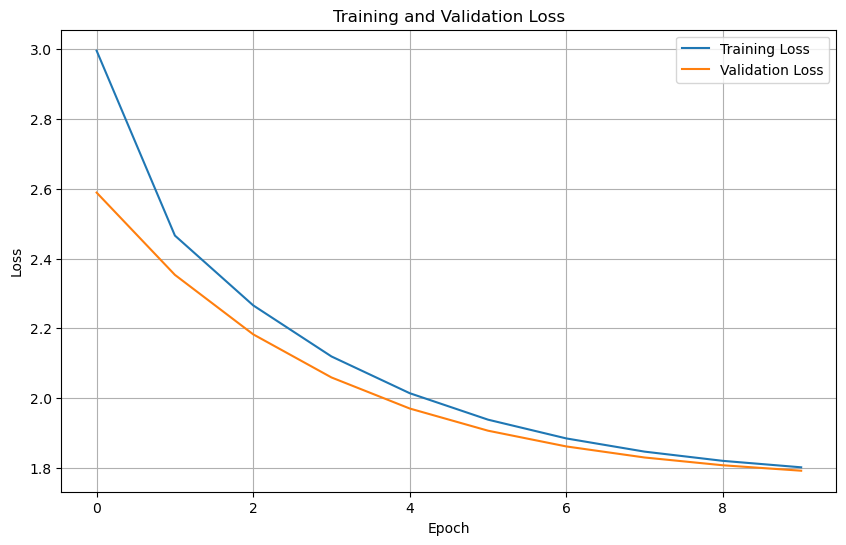

In [12]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

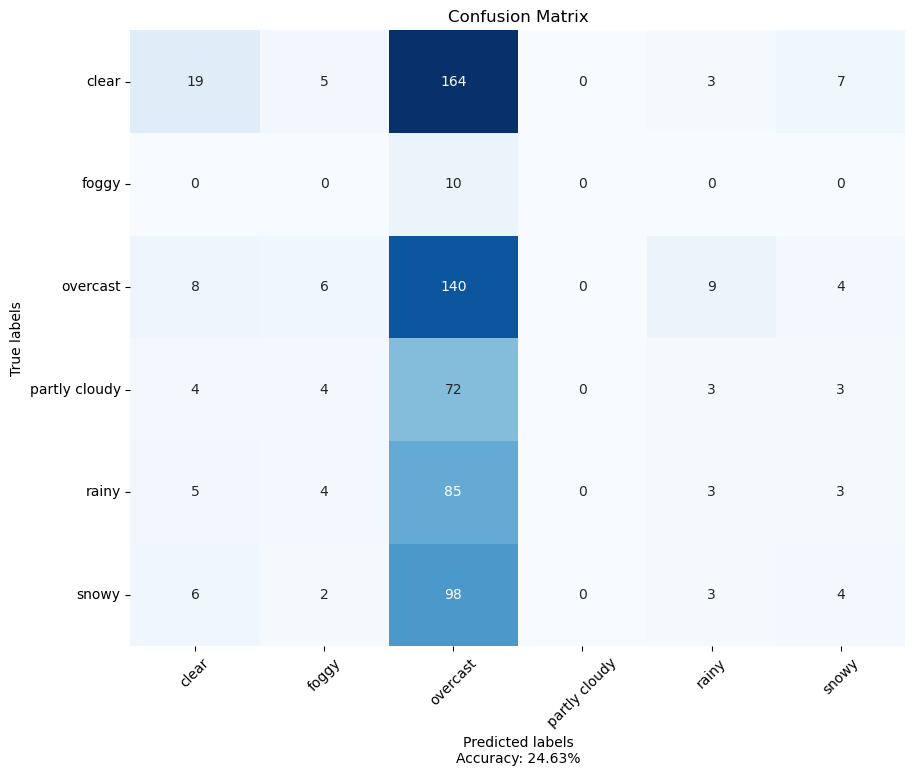

Classification Report:
               precision    recall  f1-score   support

        clear       0.45      0.10      0.16       198
        foggy       0.00      0.00      0.00        10
     overcast       0.25      0.84      0.38       167
partly cloudy       0.00      0.00      0.00        86
        rainy       0.14      0.03      0.05       100
        snowy       0.19      0.04      0.06       113

     accuracy                           0.25       674
    macro avg       0.17      0.17      0.11       674
 weighted avg       0.25      0.25      0.16       674



/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions for the validation set
val_predictions = model.predict(validation_generator)
val_predictions = np.argmax(val_predictions, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(val_labels, val_predictions)

# Get class names from label encoder
class_names = label_encoder.classes_

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Calculate accuracy and format as percentage
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix) * 100
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy:.2f}%')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Set tick labels to class names
plt.xticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=45)
plt.yticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=0)

plt.show()

# Print classification report with class names
print("Classification Report:")
print(classification_report(val_labels, val_predictions, target_names=class_names))


In [14]:
import tensorflow as tf
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

# Assuming 'model' is your trained TensorFlow model
# Define a function to export the model to a .pb file
def save_frozen_model(model, model_path):
    # Convert Keras model to ConcreteFunction
    full_model = tf.function(lambda x: model(x))
    concrete_function = full_model.get_concrete_function(tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

    # Convert variables to constants inside the TensorFlow graph
    frozen_func = convert_variables_to_constants_v2(concrete_function)

    # Save the frozen graph to a .pb file
    tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                      logdir="./",
                      name=model_path,
                      as_text=False)

# Save the model as a frozen graph (.pb file)
save_frozen_model(model, "frozen_model_CNN.pb")


2024-03-26 22:44:50.035295: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-26 22:44:50.035458: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2024-03-26 22:44:50.035555: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2024-03-26 22:44:50.035945: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-26 22:44:50.036030: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: GRID A100X-20C computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 20.00GiB deviceMemoryBandwidth: 1.41TiB/s
2024-03-26 22:44:50.036062: I t

# Training ResNet50 model on the whole dataset and convert the trained model with weights to a frozen model

In [115]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, callbacks
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50  # Import the pre-trained ResNet50 model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# Define image dimensions
target_height, target_width = 224, 224  # Update dimensions as per your requirement

# Define batch size
batch_size = 32

# Extract image paths and labels from train_weather_data_downsampled
image_paths = [data[0] for data in train_weather_data_downsampled]
labels = [data[1] for data in train_weather_data_downsampled]

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Calculate the number of classes (unique labels)
num_classes = len(np.unique(labels_encoded))

# Split data into training and validation sets
train_image_paths, val_image_paths, train_labels, val_labels = train_test_split(
    image_paths, labels_encoded, test_size=0.2, random_state=42)

# Define a custom data generator class
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_paths, labels, batch_size, target_height, target_width, shuffle=True):
        self.image_paths = image_paths
        self.labels = labels
        self.batch_size = batch_size
        self.target_height = target_height
        self.target_width = target_width
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.image_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_image_paths = [self.image_paths[i] for i in batch_indexes]
        batch_labels = [self.labels[i] for i in batch_indexes]
        X, y = self.__data_generation(batch_image_paths, batch_labels)
        return X, y

    def __data_generation(self, batch_image_paths, batch_labels):
        X = np.empty((len(batch_image_paths), self.target_height, self.target_width, 3))
        y = np.empty((len(batch_image_paths)), dtype=int)
        for i, (image_path, label) in enumerate(zip(batch_image_paths, batch_labels)):
            # Load image and resize
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(self.target_height, self.target_width))
            # Convert to array
            image = tf.keras.preprocessing.image.img_to_array(image)
            X[i] = image / 255.0  # Normalize pixel values
            y[i] = label
        return X, y

# Create train and validation generators
train_generator = DataGenerator(train_image_paths, train_labels, batch_size, target_height, target_width)
validation_generator = DataGenerator(val_image_paths, val_labels, batch_size, target_height, target_width)

# Load pre-trained ResNet50 model (without including the top classification layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(target_height, target_width, 3))

# Freeze the layers of the pre-trained model
base_model.trainable = False

# Add your own classification layers on top of the pre-trained model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define a callback to print training progress
class PrintProgress(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch+1}/{self.params['epochs']}, "
              f"loss: {logs['loss']:.4f}, "
              f"accuracy: {logs['accuracy']:.4f}, "
              f"val_loss: {logs['val_loss']:.4f}, "
              f"val_accuracy: {logs['val_accuracy']:.4f}")

# Define the ReduceLROnPlateau callback
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-4)

# Define EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)


# Train the model with learning rate scheduling
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[PrintProgress(), early_stopping, model_checkpoint])


Epoch 1/10
85/85 [==============================] - 36s 385ms/step - loss: 9.7457 - accuracy: 0.2135 - val_loss: 35.7435 - val_accuracy: 0.2374

Epoch 1/10, loss: 7.4723, accuracy: 0.2281, val_loss: 35.7435, val_accuracy: 0.2374
Epoch 2/10
85/85 [==============================] - 32s 372ms/step - loss: 72.5851 - accuracy: 0.1911 - val_loss: 1.7773 - val_accuracy: 0.2507

Epoch 2/10, loss: 34.6667, accuracy: 0.1973, val_loss: 1.7773, val_accuracy: 0.2507
Epoch 3/10
85/85 [==============================] - 32s 373ms/step - loss: 5.3288 - accuracy: 0.2323 - val_loss: 1.7698 - val_accuracy: 0.2938

Epoch 3/10, loss: 2.8700, accuracy: 0.2415, val_loss: 1.7698, val_accuracy: 0.2938
Epoch 4/10
85/85 [==============================] - 32s 375ms/step - loss: 3.9164 - accuracy: 0.2364 - val_loss: 1.7610 - val_accuracy: 0.2938

Epoch 4/10, loss: 2.4678, accuracy: 0.2370, val_loss: 1.7610, val_accuracy: 0.2938
Epoch 5/10
85/85 [==============================] - 32s 377ms/step - loss: 1.7723 - accu

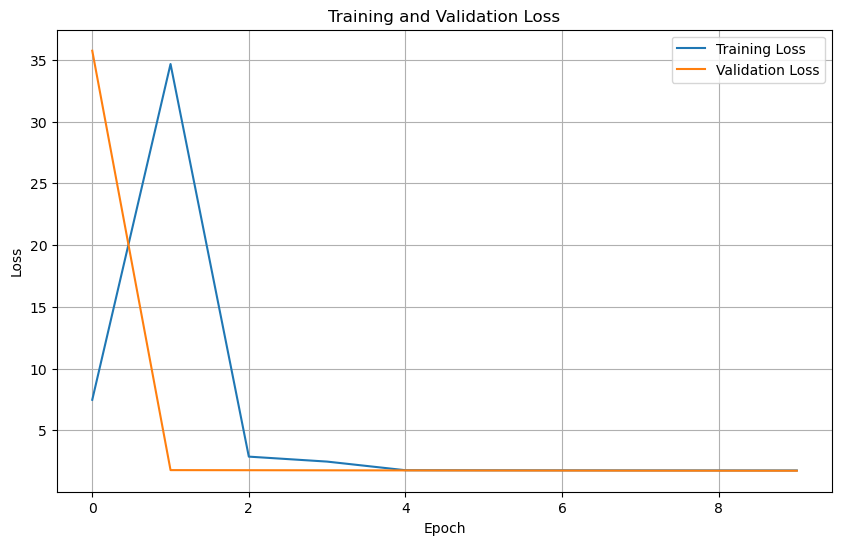

In [116]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

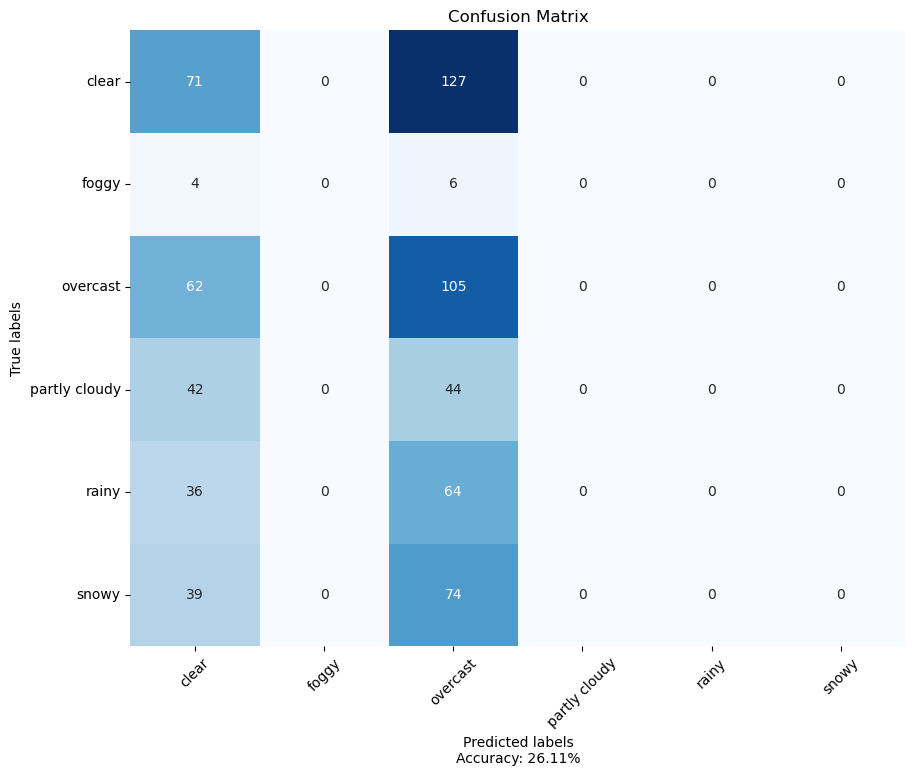

Classification Report:
               precision    recall  f1-score   support

        clear       0.28      0.36      0.31       198
        foggy       0.00      0.00      0.00        10
     overcast       0.25      0.63      0.36       167
partly cloudy       0.00      0.00      0.00        86
        rainy       0.00      0.00      0.00       100
        snowy       0.00      0.00      0.00       113

     accuracy                           0.26       674
    macro avg       0.09      0.16      0.11       674
 weighted avg       0.14      0.26      0.18       674



/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions for the validation set
val_predictions = model.predict(validation_generator)
val_predictions = np.argmax(val_predictions, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(val_labels, val_predictions)

# Get class names from label encoder
class_names = label_encoder.classes_

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Calculate accuracy and format as percentage
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix) * 100
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy:.2f}%')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Set tick labels to class names
plt.xticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=45)
plt.yticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=0)

plt.show()

# Print classification report with class names
print("Classification Report:")
print(classification_report(val_labels, val_predictions, target_names=class_names))


In [118]:
import tensorflow as tf
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

# Assuming 'model' is your trained TensorFlow model
# Define a function to export the model to a .pb file
def save_frozen_model(model, model_path):
    # Convert Keras model to ConcreteFunction
    full_model = tf.function(lambda x: model(x))
    concrete_function = full_model.get_concrete_function(tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

    # Convert variables to constants inside the TensorFlow graph
    frozen_func = convert_variables_to_constants_v2(concrete_function)

    # Save the frozen graph to a .pb file
    tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                      logdir="./",
                      name=model_path,
                      as_text=False)

# Save the model as a frozen graph (.pb file)
save_frozen_model(model, "frozen_model_ResNet50.pb")


2024-03-26 04:20:07.196335: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-26 04:20:07.196541: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2024-03-26 04:20:07.196745: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2024-03-26 04:20:07.197413: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-26 04:20:07.197522: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: GRID A100X-20C computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 20.00GiB deviceMemoryBandwidth: 1.41TiB/s
2024-03-26 04:20:07.197610: I t

# Training EfficientNetB0 model on the whole dataset and convert the trained model with weights to a frozen model

In [119]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, callbacks
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0  # Import EfficientNetB0

# Define image dimensions
target_height, target_width = 224, 224  # Update dimensions as per your requirement

# Define batch size
batch_size = 32

# Extract image paths and labels from train_weather_data_downsampled
image_paths = [data[0] for data in train_weather_data_downsampled]
labels = [data[1] for data in train_weather_data_downsampled]

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Calculate the number of classes (unique labels)
num_classes = len(np.unique(labels_encoded))

# Split data into training and validation sets
train_image_paths, val_image_paths, train_labels, val_labels = train_test_split(
    image_paths, labels_encoded, test_size=0.2, random_state=42)

# Define a custom data generator class
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_paths, labels, batch_size, target_height, target_width, shuffle=True):
        self.image_paths = image_paths
        self.labels = labels
        self.batch_size = batch_size
        self.target_height = target_height
        self.target_width = target_width
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.image_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_image_paths = [self.image_paths[i] for i in batch_indexes]
        batch_labels = [self.labels[i] for i in batch_indexes]
        X, y = self.__data_generation(batch_image_paths, batch_labels)
        return X, y

    def __data_generation(self, batch_image_paths, batch_labels):
        X = np.empty((len(batch_image_paths), self.target_height, self.target_width, 3))
        y = np.empty((len(batch_image_paths)), dtype=int)
        for i, (image_path, label) in enumerate(zip(batch_image_paths, batch_labels)):
            # Load image and resize
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(self.target_height, self.target_width))
            # Convert to array
            image = tf.keras.preprocessing.image.img_to_array(image)
            X[i] = image / 255.0  # Normalize pixel values
            y[i] = label
        return X, y

# Create train and validation generators
train_generator = DataGenerator(train_image_paths, train_labels, batch_size, target_height, target_width)
validation_generator = DataGenerator(val_image_paths, val_labels, batch_size, target_height, target_width)

# Load pre-trained EfficientNetB0 model (without including the top classification layers)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(target_height, target_width, 3))

# Add your own classification layers on top of the pre-trained model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define a callback to print training progress
class PrintProgress(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch+1}/{self.params['epochs']}, "
              f"loss: {logs['loss']:.4f}, "
              f"accuracy: {logs['accuracy']:.4f}, "
              f"val_loss: {logs['val_loss']:.4f}, "
              f"val_accuracy: {logs['val_accuracy']:.4f}")

# Define EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[PrintProgress(), early_stopping, model_checkpoint])


16711680/16705208 [==============================] - 0s 0us/step
Epoch 1/10
85/85 [==============================] - 629s 5s/step - loss: 1.7912 - accuracy: 0.2476 - val_loss: 1.7890 - val_accuracy: 0.2478

Epoch 1/10, loss: 1.7905, accuracy: 0.2604, val_loss: 1.7890, val_accuracy: 0.2478
Epoch 2/10
85/85 [==============================] - 32s 380ms/step - loss: 1.7885 - accuracy: 0.2831 - val_loss: 1.7863 - val_accuracy: 0.2478

Epoch 2/10, loss: 1.7881, accuracy: 0.2637, val_loss: 1.7863, val_accuracy: 0.2478
Epoch 3/10
85/85 [==============================] - 32s 377ms/step - loss: 1.7861 - accuracy: 0.2682 - val_loss: 1.7837 - val_accuracy: 0.2478

Epoch 3/10, loss: 1.7856, accuracy: 0.2637, val_loss: 1.7837, val_accuracy: 0.2478
Epoch 4/10
85/85 [==============================] - 32s 376ms/step - loss: 1.7833 - accuracy: 0.2720 - val_loss: 1.7810 - val_accuracy: 0.2478

Epoch 4/10, loss: 1.7833, accuracy: 0.2637, val_loss: 1.7810, val_accuracy: 0.2478
Epoch 5/10
85/85 [===========

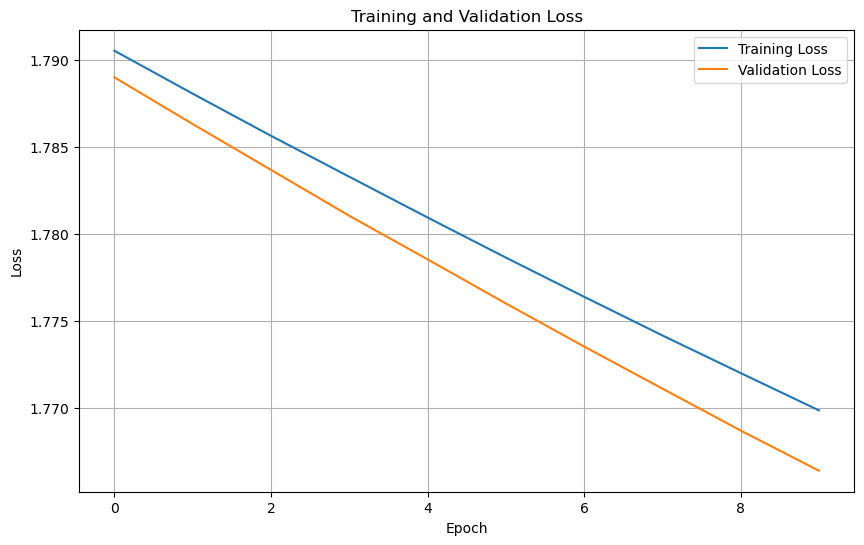

In [120]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

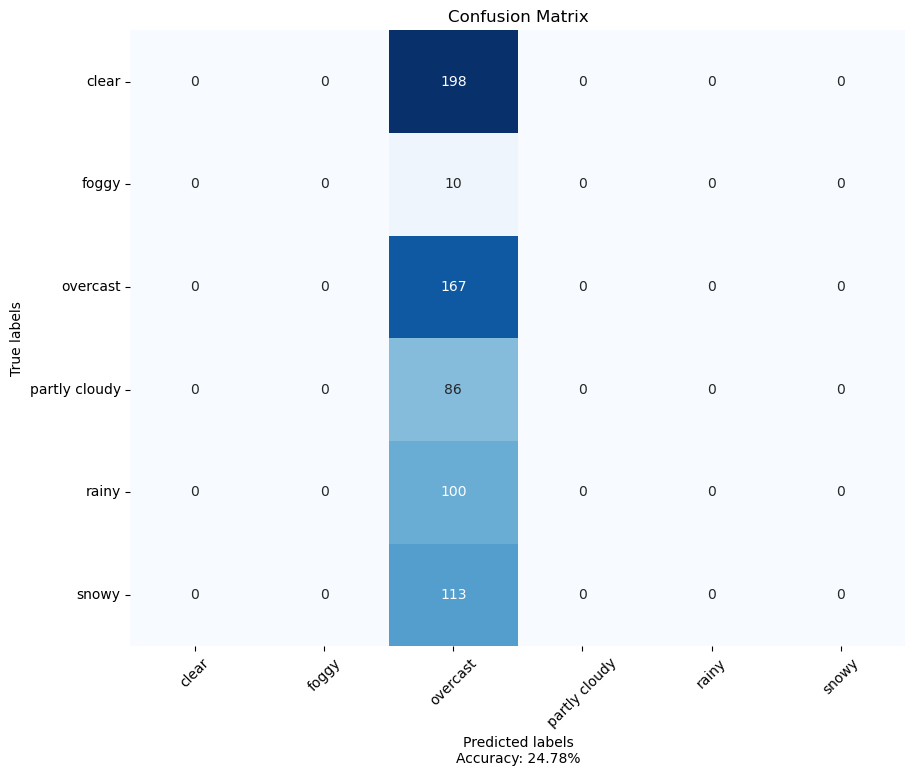

Classification Report:
               precision    recall  f1-score   support

        clear       0.00      0.00      0.00       198
        foggy       0.00      0.00      0.00        10
     overcast       0.25      1.00      0.40       167
partly cloudy       0.00      0.00      0.00        86
        rainy       0.00      0.00      0.00       100
        snowy       0.00      0.00      0.00       113

     accuracy                           0.25       674
    macro avg       0.04      0.17      0.07       674
 weighted avg       0.06      0.25      0.10       674



/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions for the validation set
val_predictions = model.predict(validation_generator)
val_predictions = np.argmax(val_predictions, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(val_labels, val_predictions)

# Get class names from label encoder
class_names = label_encoder.classes_

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Calculate accuracy and format as percentage
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix) * 100
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy:.2f}%')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Set tick labels to class names
plt.xticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=45)
plt.yticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=0)

plt.show()

# Print classification report with class names
print("Classification Report:")
print(classification_report(val_labels, val_predictions, target_names=class_names))


In [122]:
import tensorflow as tf
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

# Assuming 'model' is your trained TensorFlow model
# Define a function to export the model to a .pb file
def save_frozen_model(model, model_path):
    # Convert Keras model to ConcreteFunction
    full_model = tf.function(lambda x: model(x))
    concrete_function = full_model.get_concrete_function(tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

    # Convert variables to constants inside the TensorFlow graph
    frozen_func = convert_variables_to_constants_v2(concrete_function)

    # Save the frozen graph to a .pb file
    tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                      logdir="./",
                      name=model_path,
                      as_text=False)

# Save the model as a frozen graph (.pb file)
save_frozen_model(model, "frozen_model_EfficientNetB0.pb")


2024-03-26 04:48:02.598545: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-26 04:48:02.598722: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2024-03-26 04:48:02.598842: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2024-03-26 04:48:02.599251: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-26 04:48:02.599345: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: GRID A100X-20C computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 20.00GiB deviceMemoryBandwidth: 1.41TiB/s
2024-03-26 04:48:02.599395: I t

# Remove some labels from the dataset and do downsampling

Class: clear, Count: 877
Class: foggy, Count: 63
Class: overcast, Count: 877
Class: partly cloudy, Count: 488


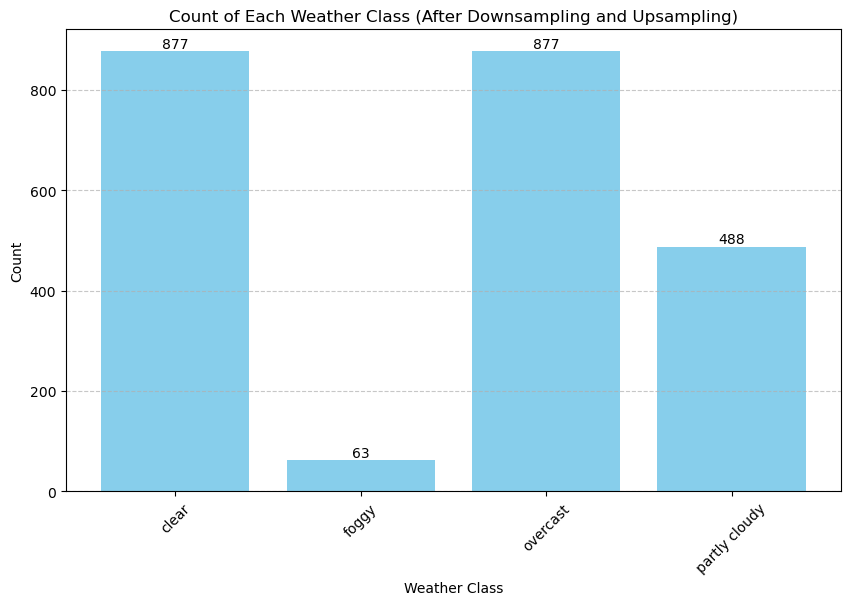

In [123]:
import random
from collections import Counter

# Define the desired number of samples for each class
desired_samples_per_class = {
    'clear': 877, # 877
    'foggy': 130, # 130
    'overcast': 877, # 877
    'partly cloudy': 488 # 488
}

# Initialize an empty list to store downsampled data
train_weather_data_downsampled = []

# Downsample each class individually
for label, desired_samples in desired_samples_per_class.items():
    # Filter out samples belonging to the current class
    class_samples = [(image_path, label) for image_path, l in train_weather_data if l == label]
    
    # If the class has more samples than the desired number, randomly select a subset
    if len(class_samples) > desired_samples:
        downsampled_samples = random.sample(class_samples, desired_samples)
    else:
        downsampled_samples = class_samples
    
    # Append the downsampled samples to the list
    train_weather_data_downsampled.extend(downsampled_samples)

# Upsample the "foggy" class to match the desired number of samples
#foggy_samples = [(image_path, label) for image_path, label in train_weather_data_downsampled if label == 'foggy']
#while len(foggy_samples) < desired_samples_per_class['foggy']:
    # Randomly select a foggy sample to duplicate
#    sample_to_duplicate = random.choice(foggy_samples)
#    foggy_samples.append(sample_to_duplicate)

# Append the upsampled foggy samples to the downsampled data
#train_weather_data_downsampled.extend(foggy_samples)

# Count the occurrences of each class in the downsampled dataset
class_counts_downsampled = Counter(label for _, label in train_weather_data_downsampled)

# Print the count of each class
for label, count in class_counts_downsampled.items():
    print(f"Class: {label}, Count: {count}")

# Extract labels and counts
labels = list(class_counts_downsampled.keys())
counts = list(class_counts_downsampled.values())

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color='skyblue')

# Add counts above bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(count), ha='center', va='bottom')

plt.xlabel('Weather Class')
plt.ylabel('Count')
plt.title('Count of Each Weather Class (After Downsampling and Upsampling)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Training again on the new dataset using CNN, ResNet50, and EfficientNetB0

In [128]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, callbacks
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define image dimensions
target_height, target_width = 224, 224  # Update dimensions as per your requirement

# Define batch size
batch_size = 16

# Extract image paths and labels from train_weather_data_downsampled
image_paths = [data[0] for data in train_weather_data_downsampled]
labels = [data[1] for data in train_weather_data_downsampled]

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Calculate the number of classes (unique labels)
num_classes = len(np.unique(labels_encoded))

# Split data into training and validation sets
train_image_paths, val_image_paths, train_labels, val_labels = train_test_split(
    image_paths, labels_encoded, test_size=0.2, random_state=42)

# Create a custom data generator class
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_paths, labels, batch_size, target_height, target_width, shuffle=True):
        self.image_paths = image_paths
        self.labels = labels
        self.batch_size = batch_size
        self.target_height = target_height
        self.target_width = target_width
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.image_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_image_paths = [self.image_paths[i] for i in batch_indexes]
        batch_labels = [self.labels[i] for i in batch_indexes]
        X, y = self.__data_generation(batch_image_paths, batch_labels)
        return X, y

    def __data_generation(self, batch_image_paths, batch_labels):
        X = np.empty((len(batch_image_paths), self.target_height, self.target_width, 3))
        y = np.empty((len(batch_image_paths)), dtype=int)
        for i, (image_path, label) in enumerate(zip(batch_image_paths, batch_labels)):
            # Load image and resize
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(self.target_height, self.target_width))
            # Convert to array
            image = tf.keras.preprocessing.image.img_to_array(image)
            X[i] = image / 255.0  # Normalize pixel values
            y[i] = label
        return X, y

# Create train and validation generators
train_generator = DataGenerator(train_image_paths, train_labels, batch_size, target_height, target_width)
validation_generator = DataGenerator(val_image_paths, val_labels, batch_size, target_height, target_width)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(target_height, target_width, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define a callback to print training progress
class PrintProgress(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch+1}/{self.params['epochs']}, "
              f"loss: {logs['loss']:.4f}, "
              f"accuracy: {logs['accuracy']:.4f}, "
              f"val_loss: {logs['val_loss']:.4f}, "
              f"val_accuracy: {logs['val_accuracy']:.4f}")

# Define the ReduceLROnPlateau callback
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-10)

# Define EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_CNN.h5', monitor='val_loss', save_best_only=True)


# Train the model with learning rate scheduling
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[PrintProgress(), early_stopping, model_checkpoint])

Epoch 1/10
116/116 [==============================] - 22s 189ms/step - loss: 1.9821 - accuracy: 0.3871 - val_loss: 1.2073 - val_accuracy: 0.3514

Epoch 1/10, loss: 1.4646, accuracy: 0.3861, val_loss: 1.2073, val_accuracy: 0.3514
Epoch 2/10
116/116 [==============================] - 22s 187ms/step - loss: 1.1751 - accuracy: 0.3710 - val_loss: 1.1845 - val_accuracy: 0.3905

Epoch 2/10, loss: 1.1767, accuracy: 0.3677, val_loss: 1.1845, val_accuracy: 0.3905
Epoch 3/10
116/116 [==============================] - 22s 187ms/step - loss: 1.1707 - accuracy: 0.3757 - val_loss: 1.1843 - val_accuracy: 0.3514

Epoch 3/10, loss: 1.1639, accuracy: 0.3812, val_loss: 1.1843, val_accuracy: 0.3514
Epoch 4/10
116/116 [==============================] - 22s 187ms/step - loss: 1.1721 - accuracy: 0.3722 - val_loss: 1.1817 - val_accuracy: 0.3514

Epoch 4/10, loss: 1.1602, accuracy: 0.3764, val_loss: 1.1817, val_accuracy: 0.3514
Epoch 5/10
116/116 [==============================] - 22s 188ms/step - loss: 1.1505 

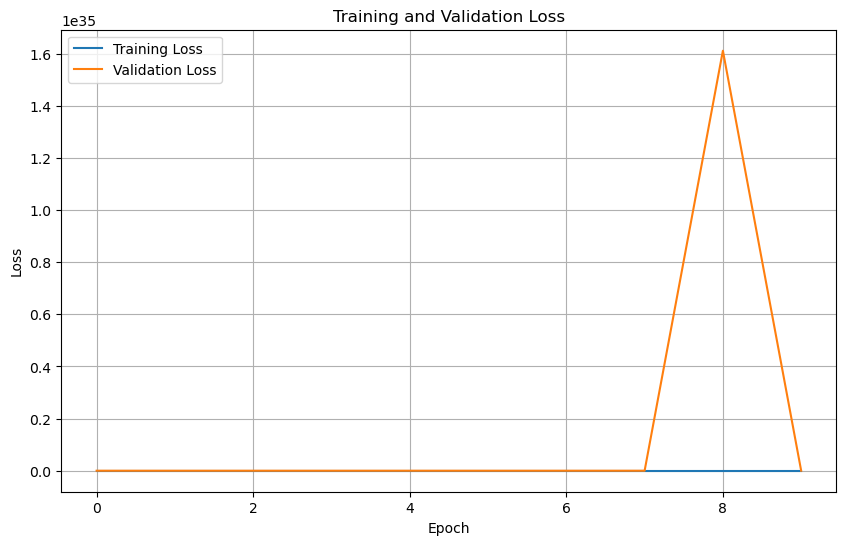

In [129]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

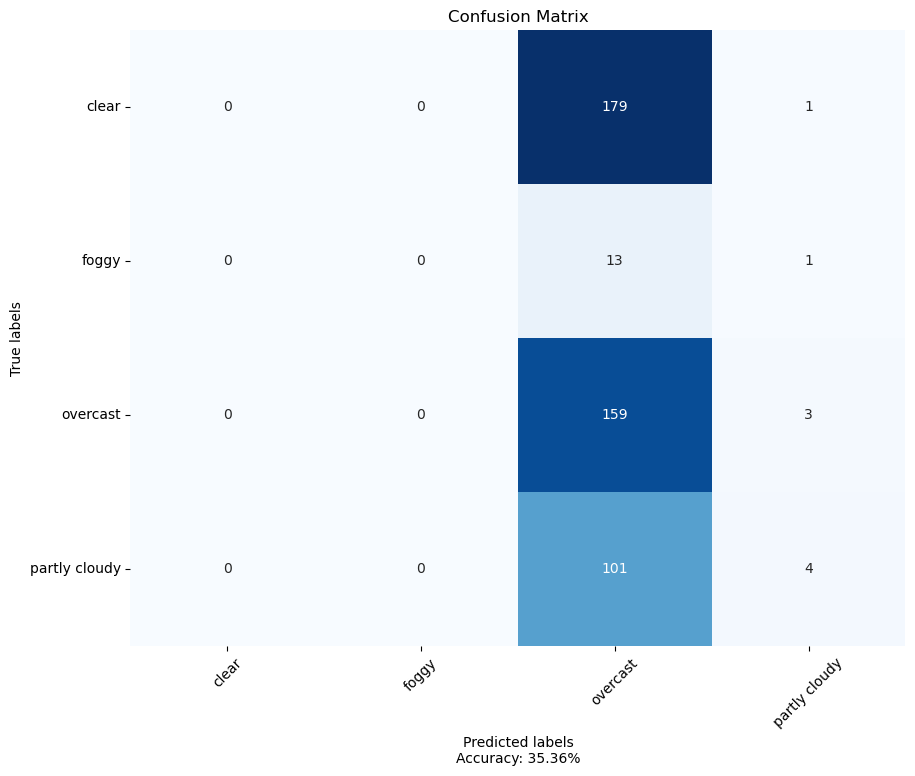

Classification Report:
               precision    recall  f1-score   support

        clear       0.00      0.00      0.00       180
        foggy       0.00      0.00      0.00        14
     overcast       0.35      0.98      0.52       162
partly cloudy       0.44      0.04      0.07       105

     accuracy                           0.35       461
    macro avg       0.20      0.25      0.15       461
 weighted avg       0.22      0.35      0.20       461



/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions for the validation set
val_predictions = model.predict(validation_generator)
val_predictions = np.argmax(val_predictions, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(val_labels, val_predictions)

# Get class names from label encoder
class_names = label_encoder.classes_

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Calculate accuracy and format as percentage
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix) * 100
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy:.2f}%')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Set tick labels to class names
plt.xticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=45)
plt.yticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=0)

plt.show()

# Print classification report with class names
print("Classification Report:")
print(classification_report(val_labels, val_predictions, target_names=class_names))


In [131]:
import tensorflow as tf
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

# Assuming 'model' is your trained TensorFlow model
# Define a function to export the model to a .pb file
def save_frozen_model(model, model_path):
    # Convert Keras model to ConcreteFunction
    full_model = tf.function(lambda x: model(x))
    concrete_function = full_model.get_concrete_function(tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

    # Convert variables to constants inside the TensorFlow graph
    frozen_func = convert_variables_to_constants_v2(concrete_function)

    # Save the frozen graph to a .pb file
    tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                      logdir="./",
                      name=model_path,
                      as_text=False)

# Save the model as a frozen graph (.pb file)
save_frozen_model(model, "frozen_model_CNN2.pb")


2024-03-26 05:05:37.096915: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-26 05:05:37.097139: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2024-03-26 05:05:37.097253: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2024-03-26 05:05:37.097872: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-26 05:05:37.097959: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: GRID A100X-20C computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 20.00GiB deviceMemoryBandwidth: 1.41TiB/s
2024-03-26 05:05:37.098018: I t

In [132]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, callbacks
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50  # Import the pre-trained ResNet50 model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# Define image dimensions
target_height, target_width = 224, 224  # Update dimensions as per your requirement

# Define batch size
batch_size = 16

# Extract image paths and labels from train_weather_data_downsampled
image_paths = [data[0] for data in train_weather_data_downsampled]
labels = [data[1] for data in train_weather_data_downsampled]

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Calculate the number of classes (unique labels)
num_classes = len(np.unique(labels_encoded))

# Split data into training and validation sets
train_image_paths, val_image_paths, train_labels, val_labels = train_test_split(
    image_paths, labels_encoded, test_size=0.2, random_state=42)

# Define a custom data generator class
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_paths, labels, batch_size, target_height, target_width, shuffle=True):
        self.image_paths = image_paths
        self.labels = labels
        self.batch_size = batch_size
        self.target_height = target_height
        self.target_width = target_width
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.image_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_image_paths = [self.image_paths[i] for i in batch_indexes]
        batch_labels = [self.labels[i] for i in batch_indexes]
        X, y = self.__data_generation(batch_image_paths, batch_labels)
        return X, y

    def __data_generation(self, batch_image_paths, batch_labels):
        X = np.empty((len(batch_image_paths), self.target_height, self.target_width, 3))
        y = np.empty((len(batch_image_paths)), dtype=int)
        for i, (image_path, label) in enumerate(zip(batch_image_paths, batch_labels)):
            # Load image and resize
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(self.target_height, self.target_width))
            # Convert to array
            image = tf.keras.preprocessing.image.img_to_array(image)
            X[i] = image / 255.0  # Normalize pixel values
            y[i] = label
        return X, y

# Create train and validation generators
train_generator = DataGenerator(train_image_paths, train_labels, batch_size, target_height, target_width)
validation_generator = DataGenerator(val_image_paths, val_labels, batch_size, target_height, target_width)

# Load pre-trained ResNet50 model (without including the top classification layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(target_height, target_width, 3))

# Freeze the layers of the pre-trained model
base_model.trainable = False

# Add your own classification layers on top of the pre-trained model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define a callback to print training progress
class PrintProgress(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch+1}/{self.params['epochs']}, "
              f"loss: {logs['loss']:.4f}, "
              f"accuracy: {logs['accuracy']:.4f}, "
              f"val_loss: {logs['val_loss']:.4f}, "
              f"val_accuracy: {logs['val_accuracy']:.4f}")

# Define the ReduceLROnPlateau callback
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-4)

# Define EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)


# Train the model with learning rate scheduling
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[PrintProgress(), early_stopping, model_checkpoint])


Epoch 1/10
116/116 [==============================] - 81s 686ms/step - loss: 4.4712 - accuracy: 0.3436 - val_loss: 1.3615 - val_accuracy: 0.3970

Epoch 1/10, loss: 2.8126, accuracy: 0.3492, val_loss: 1.3615, val_accuracy: 0.3970
Epoch 2/10
116/116 [==============================] - 22s 190ms/step - loss: 1.5032 - accuracy: 0.3481 - val_loss: 1.3471 - val_accuracy: 0.3818

Epoch 2/10, loss: 1.4112, accuracy: 0.3764, val_loss: 1.3471, val_accuracy: 0.3818
Epoch 3/10
116/116 [==============================] - 22s 189ms/step - loss: 1.3750 - accuracy: 0.3922 - val_loss: 1.3278 - val_accuracy: 0.3514

Epoch 3/10, loss: 1.3450, accuracy: 0.3764, val_loss: 1.3278, val_accuracy: 0.3514
Epoch 4/10
116/116 [==============================] - 22s 189ms/step - loss: 1.3099 - accuracy: 0.3840 - val_loss: 1.3116 - val_accuracy: 0.3514

Epoch 4/10, loss: 1.2934, accuracy: 0.3682, val_loss: 1.3116, val_accuracy: 0.3514
Epoch 5/10
116/116 [==============================] - 22s 189ms/step - loss: 1.2984 

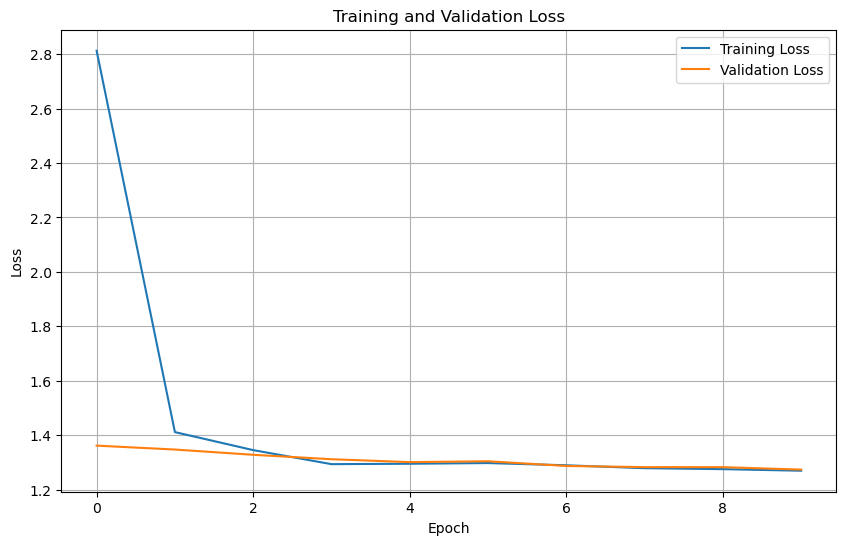

In [133]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

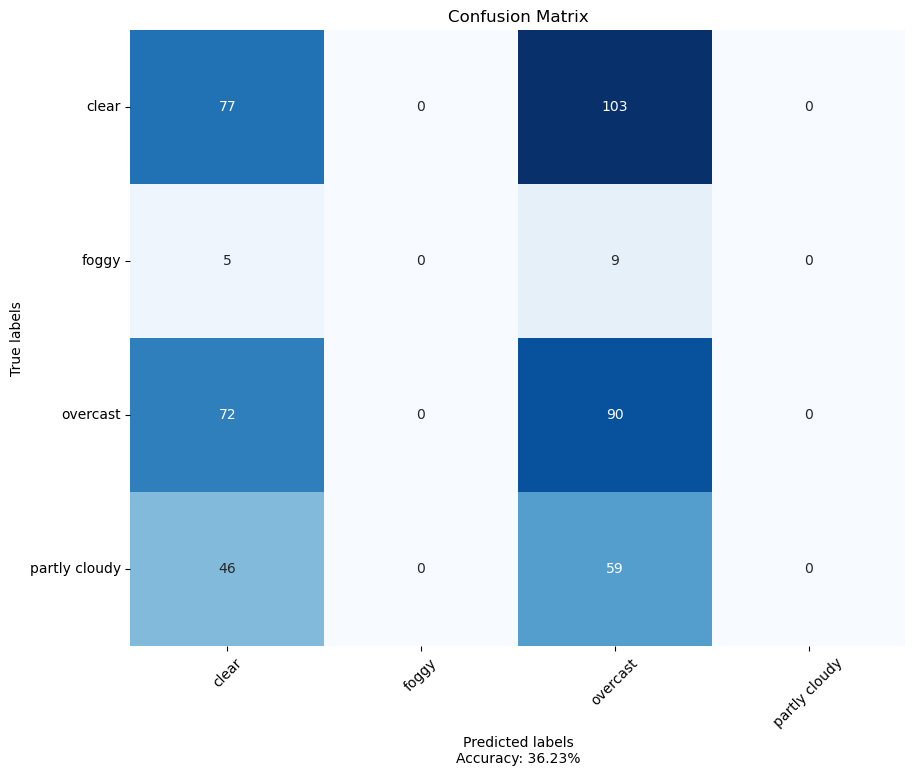

Classification Report:
               precision    recall  f1-score   support

        clear       0.39      0.43      0.41       180
        foggy       0.00      0.00      0.00        14
     overcast       0.34      0.56      0.43       162
partly cloudy       0.00      0.00      0.00       105

     accuracy                           0.36       461
    macro avg       0.18      0.25      0.21       461
 weighted avg       0.27      0.36      0.31       461



/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions for the validation set
val_predictions = model.predict(validation_generator)
val_predictions = np.argmax(val_predictions, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(val_labels, val_predictions)

# Get class names from label encoder
class_names = label_encoder.classes_

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Calculate accuracy and format as percentage
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix) * 100
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy:.2f}%')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Set tick labels to class names
plt.xticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=45)
plt.yticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=0)

plt.show()

# Print classification report with class names
print("Classification Report:")
print(classification_report(val_labels, val_predictions, target_names=class_names))


In [135]:
import tensorflow as tf
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

# Assuming 'model' is your trained TensorFlow model
# Define a function to export the model to a .pb file
def save_frozen_model(model, model_path):
    # Convert Keras model to ConcreteFunction
    full_model = tf.function(lambda x: model(x))
    concrete_function = full_model.get_concrete_function(tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

    # Convert variables to constants inside the TensorFlow graph
    frozen_func = convert_variables_to_constants_v2(concrete_function)

    # Save the frozen graph to a .pb file
    tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                      logdir="./",
                      name=model_path,
                      as_text=False)

# Save the model as a frozen graph (.pb file)
save_frozen_model(model, "frozen_model_ResNet50_2.pb")


2024-03-26 05:14:37.943445: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-26 05:14:37.943665: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2024-03-26 05:14:37.943931: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2024-03-26 05:14:37.944635: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-26 05:14:37.944760: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: GRID A100X-20C computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 20.00GiB deviceMemoryBandwidth: 1.41TiB/s
2024-03-26 05:14:37.944873: I t

In [136]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, callbacks
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0  # Import EfficientNetB0

# Define image dimensions
target_height, target_width = 224, 224  # Update dimensions as per your requirement

# Define batch size
batch_size = 16

# Extract image paths and labels from train_weather_data_downsampled
image_paths = [data[0] for data in train_weather_data_downsampled]
labels = [data[1] for data in train_weather_data_downsampled]

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Calculate the number of classes (unique labels)
num_classes = len(np.unique(labels_encoded))

# Split data into training and validation sets
train_image_paths, val_image_paths, train_labels, val_labels = train_test_split(
    image_paths, labels_encoded, test_size=0.2, random_state=42)

# Define a custom data generator class
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_paths, labels, batch_size, target_height, target_width, shuffle=True):
        self.image_paths = image_paths
        self.labels = labels
        self.batch_size = batch_size
        self.target_height = target_height
        self.target_width = target_width
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.image_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_image_paths = [self.image_paths[i] for i in batch_indexes]
        batch_labels = [self.labels[i] for i in batch_indexes]
        X, y = self.__data_generation(batch_image_paths, batch_labels)
        return X, y

    def __data_generation(self, batch_image_paths, batch_labels):
        X = np.empty((len(batch_image_paths), self.target_height, self.target_width, 3))
        y = np.empty((len(batch_image_paths)), dtype=int)
        for i, (image_path, label) in enumerate(zip(batch_image_paths, batch_labels)):
            # Load image and resize
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(self.target_height, self.target_width))
            # Convert to array
            image = tf.keras.preprocessing.image.img_to_array(image)
            X[i] = image / 255.0  # Normalize pixel values
            y[i] = label
        return X, y

# Create train and validation generators
train_generator = DataGenerator(train_image_paths, train_labels, batch_size, target_height, target_width)
validation_generator = DataGenerator(val_image_paths, val_labels, batch_size, target_height, target_width)

# Load pre-trained EfficientNetB0 model (without including the top classification layers)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(target_height, target_width, 3))

# Add your own classification layers on top of the pre-trained model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define a callback to print training progress
class PrintProgress(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch+1}/{self.params['epochs']}, "
              f"loss: {logs['loss']:.4f}, "
              f"accuracy: {logs['accuracy']:.4f}, "
              f"val_loss: {logs['val_loss']:.4f}, "
              f"val_accuracy: {logs['val_accuracy']:.4f}")

# Define EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[PrintProgress(), early_stopping, model_checkpoint])


Epoch 1/10
116/116 [==============================] - 359s 1s/step - loss: 1.3850 - accuracy: 0.3815 - val_loss: 1.3816 - val_accuracy: 0.3905

Epoch 1/10, loss: 1.3838, accuracy: 0.3769, val_loss: 1.3816, val_accuracy: 0.3905
Epoch 2/10
116/116 [==============================] - 21s 184ms/step - loss: 1.3800 - accuracy: 0.3941 - val_loss: 1.3770 - val_accuracy: 0.3514

Epoch 2/10, loss: 1.3788, accuracy: 0.3910, val_loss: 1.3770, val_accuracy: 0.3514
Epoch 3/10
116/116 [==============================] - 21s 182ms/step - loss: 1.3754 - accuracy: 0.3856 - val_loss: 1.3725 - val_accuracy: 0.3514

Epoch 3/10, loss: 1.3739, accuracy: 0.3877, val_loss: 1.3725, val_accuracy: 0.3514
Epoch 4/10
116/116 [==============================] - 21s 182ms/step - loss: 1.3699 - accuracy: 0.3777 - val_loss: 1.3681 - val_accuracy: 0.3514

Epoch 4/10, loss: 1.3691, accuracy: 0.3877, val_loss: 1.3681, val_accuracy: 0.3514
Epoch 5/10
116/116 [==============================] - 21s 183ms/step - loss: 1.3649 - 

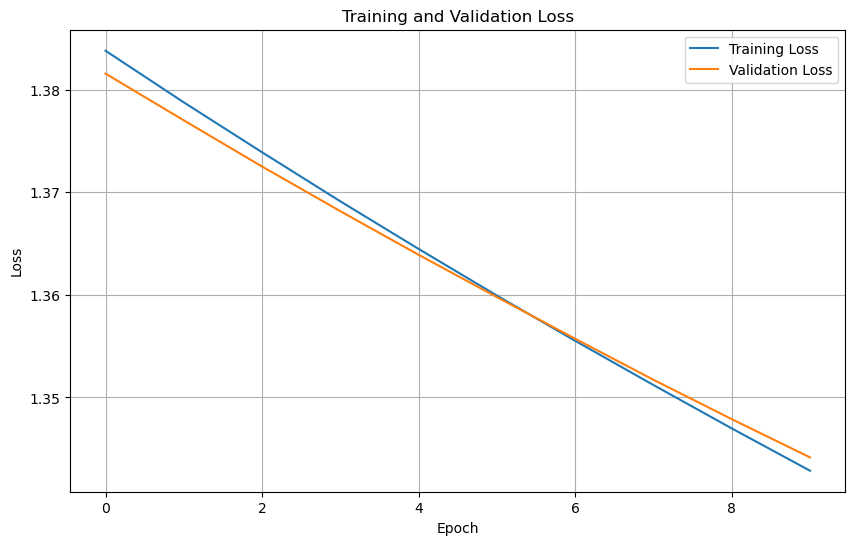

In [137]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

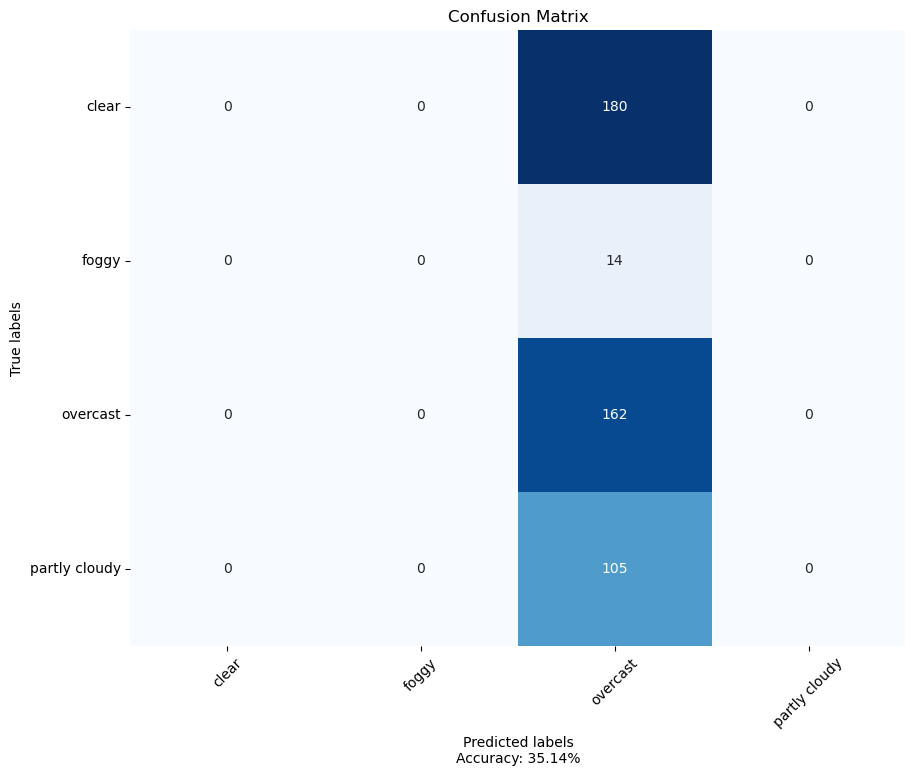

Classification Report:
               precision    recall  f1-score   support

        clear       0.00      0.00      0.00       180
        foggy       0.00      0.00      0.00        14
     overcast       0.35      1.00      0.52       162
partly cloudy       0.00      0.00      0.00       105

     accuracy                           0.35       461
    macro avg       0.09      0.25      0.13       461
 weighted avg       0.12      0.35      0.18       461



/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions for the validation set
val_predictions = model.predict(validation_generator)
val_predictions = np.argmax(val_predictions, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(val_labels, val_predictions)

# Get class names from label encoder
class_names = label_encoder.classes_

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Calculate accuracy and format as percentage
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix) * 100
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy:.2f}%')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Set tick labels to class names
plt.xticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=45)
plt.yticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=0)

plt.show()

# Print classification report with class names
print("Classification Report:")
print(classification_report(val_labels, val_predictions, target_names=class_names))


In [139]:
import tensorflow as tf
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

# Assuming 'model' is your trained TensorFlow model
# Define a function to export the model to a .pb file
def save_frozen_model(model, model_path):
    # Convert Keras model to ConcreteFunction
    full_model = tf.function(lambda x: model(x))
    concrete_function = full_model.get_concrete_function(tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

    # Convert variables to constants inside the TensorFlow graph
    frozen_func = convert_variables_to_constants_v2(concrete_function)

    # Save the frozen graph to a .pb file
    tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                      logdir="./",
                      name=model_path,
                      as_text=False)

# Save the model as a frozen graph (.pb file)
save_frozen_model(model, "frozen_model_EfficientNetB0_2.pb")


2024-03-26 16:16:55.224358: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-26 16:16:55.224521: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2024-03-26 16:16:55.224632: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2024-03-26 16:16:55.225140: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-26 16:16:55.225233: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: GRID A100X-20C computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 20.00GiB deviceMemoryBandwidth: 1.41TiB/s
2024-03-26 16:16:55.226293: I t

# Testing on unseen images

In [33]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder
import os
from IPython.display import clear_output


# validation data
val_data_subset = val_weather_data[:int(len(val_weather_data) * 0.1)]

# Filter out "undefined" label
val_data_subset_filtered = [(image_path, weather) for image_path, weather in val_data_subset if weather != "undefined"]

# Extract true labels from the filtered dataset
true_labels = [weather for _, weather in val_data_subset_filtered]

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit the label encoder with true labels
label_encoder.fit(true_labels)

# Load the frozen model
model_path = "frozen_model_ResNet50_2.pb"

# Read the graph
with tf.io.gfile.GFile(model_path, 'rb') as f:
    graph_def = tf.compat.v1.GraphDef()
    graph_def.ParseFromString(f.read())

# Access the input and output details
input_tensor_name = None
output_tensor_name = None
for node in graph_def.node:
    if node.op == 'Placeholder':  # Assuming input tensor is a Placeholder node
        input_tensor_name = node.name
    elif node.op == 'Softmax':  # Assuming output tensor is a Softmax node
        output_tensor_name = node.name

# Function to perform inference on an image
def predict_weather(image_path):
    # Prepare test data
    test_data = np.expand_dims(tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224)), axis=0)
    test_data = test_data.astype(np.float32)

    # Start a TensorFlow session
    with tf.compat.v1.Graph().as_default() as graph:
        tf.import_graph_def(graph_def, name='')
        input_tensor = graph.get_tensor_by_name(input_tensor_name + ':0')
        output_tensor = graph.get_tensor_by_name(output_tensor_name + ':0')
        with tf.compat.v1.Session(graph=graph) as sess:
            # Run inference
            output_data = sess.run(output_tensor, feed_dict={input_tensor: test_data})

    return output_data

# Initialize lists to store predicted labels
predicted_labels = []

# Evaluate the model on filtered validation data and collect predictions
for image_path, true_label in val_data_subset_filtered:
    predicted_probabilities = predict_weather(image_path)
    predicted_label = np.argmax(predicted_probabilities)
    predicted_labels.append(predicted_label)
    
    # Transform the true label
    true_label_encoded = label_encoder.transform([true_label])[0]
    clear_output(wait=True)
    # Print the predicted and true labels
    print(f"Image: {image_path}, Predicted Label (Encoded): {predicted_label}, True Label (Encoded): {true_label_encoded}")

# Convert true labels to numpy array
true_labels_encoded = label_encoder.transform(true_labels)

# Convert predicted labels to numpy array
predicted_labels = np.array(predicted_labels)

# Calculate accuracy, precision, and F1 score
accuracy = accuracy_score(true_labels_encoded, predicted_labels)
precision = precision_score(true_labels_encoded, predicted_labels, average='weighted')
f1 = f1_score(true_labels_encoded, predicted_labels, average='weighted')

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


Image: bdd100k/images/100k/val/b433534e-ff3646aa.jpg, Predicted Label (Encoded): 0, True Label (Encoded): 0
Accuracy: 0.4319526627218935
Precision: 0.3018513093912941
F1 Score: 0.26400466361967323


/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2024-04-04 03:44:46.795675: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-04 03:44:46.795942: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: GRID A100X-20C computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 20.00GiB deviceMemoryBandwidth: 1.41TiB/s
2024-04-04 03:44:46.795983: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-04-04 03:44:46.796019: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-04-04 03:44:46.796031: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2024-04-04 03:44:46.796041: I tensorflow/stream_executor/platform

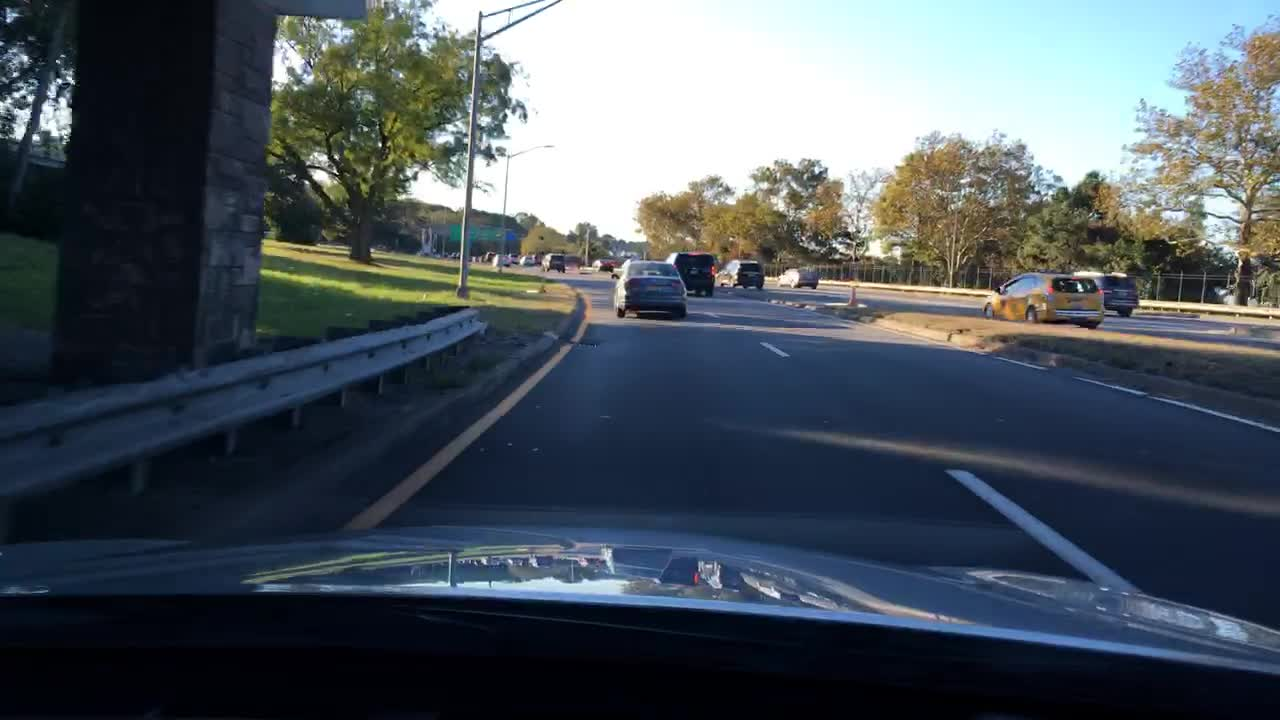

Predicted Label: clear


2024-04-04 03:44:47.886054: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-04 03:44:47.886331: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: GRID A100X-20C computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 20.00GiB deviceMemoryBandwidth: 1.41TiB/s
2024-04-04 03:44:47.886380: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-04-04 03:44:47.886419: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-04-04 03:44:47.886430: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2024-04-04 03:44:47.886440: I tensorflow/stream_executor/platform

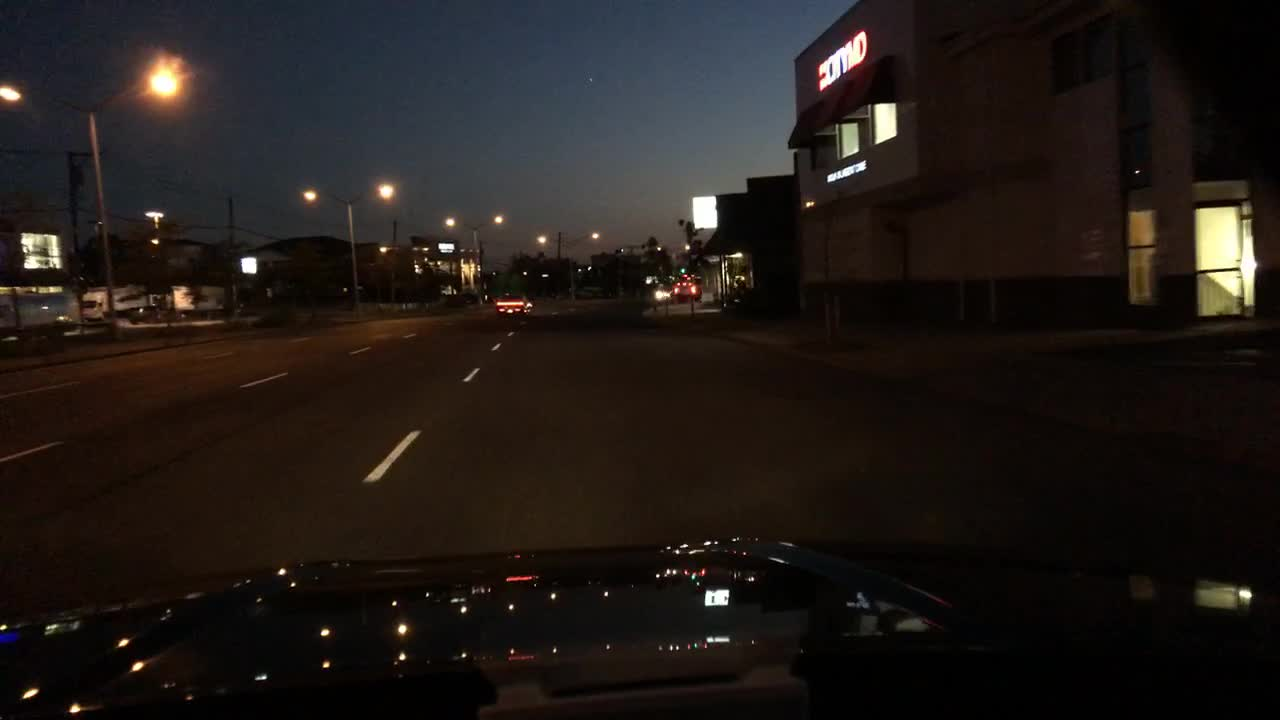

Predicted Label: clear


2024-04-04 03:44:48.969342: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-04 03:44:48.969600: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: GRID A100X-20C computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 20.00GiB deviceMemoryBandwidth: 1.41TiB/s
2024-04-04 03:44:48.969650: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-04-04 03:44:48.969687: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-04-04 03:44:48.969697: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2024-04-04 03:44:48.969713: I tensorflow/stream_executor/platform

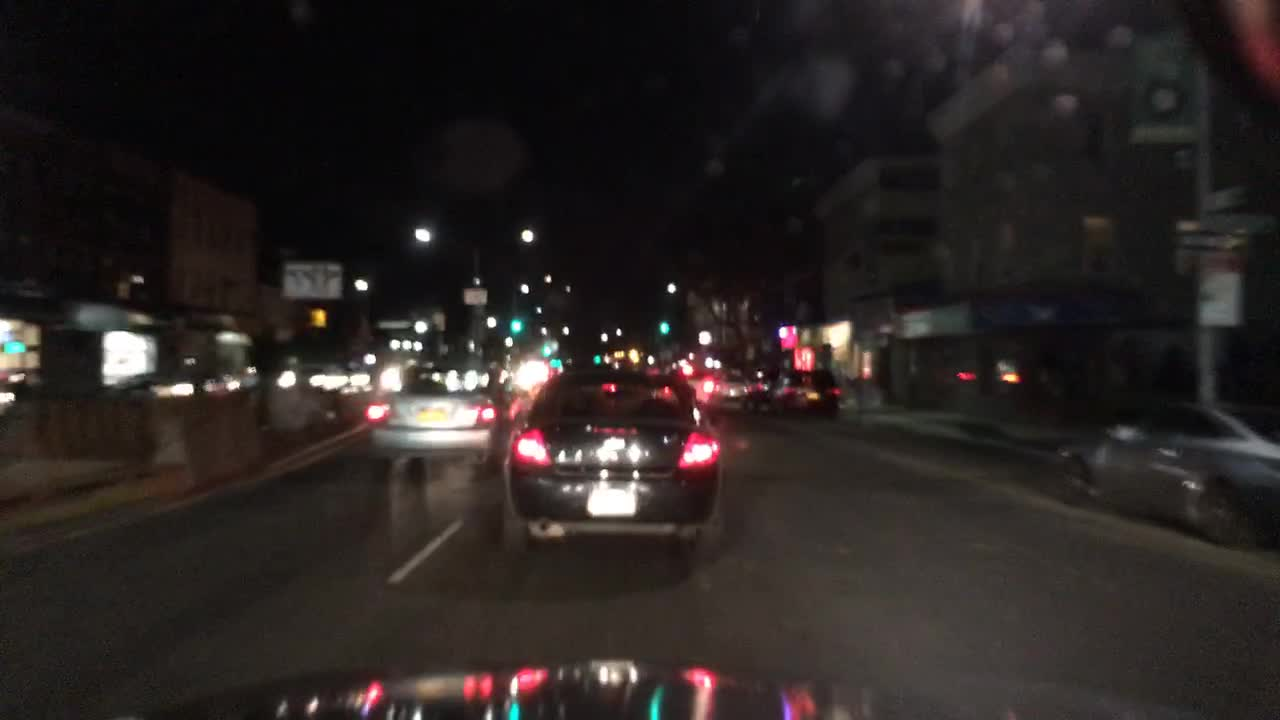

Predicted Label: clear


2024-04-04 03:44:50.036574: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-04 03:44:50.036865: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: GRID A100X-20C computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 20.00GiB deviceMemoryBandwidth: 1.41TiB/s
2024-04-04 03:44:50.036916: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-04-04 03:44:50.036951: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-04-04 03:44:50.036961: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2024-04-04 03:44:50.036971: I tensorflow/stream_executor/platform

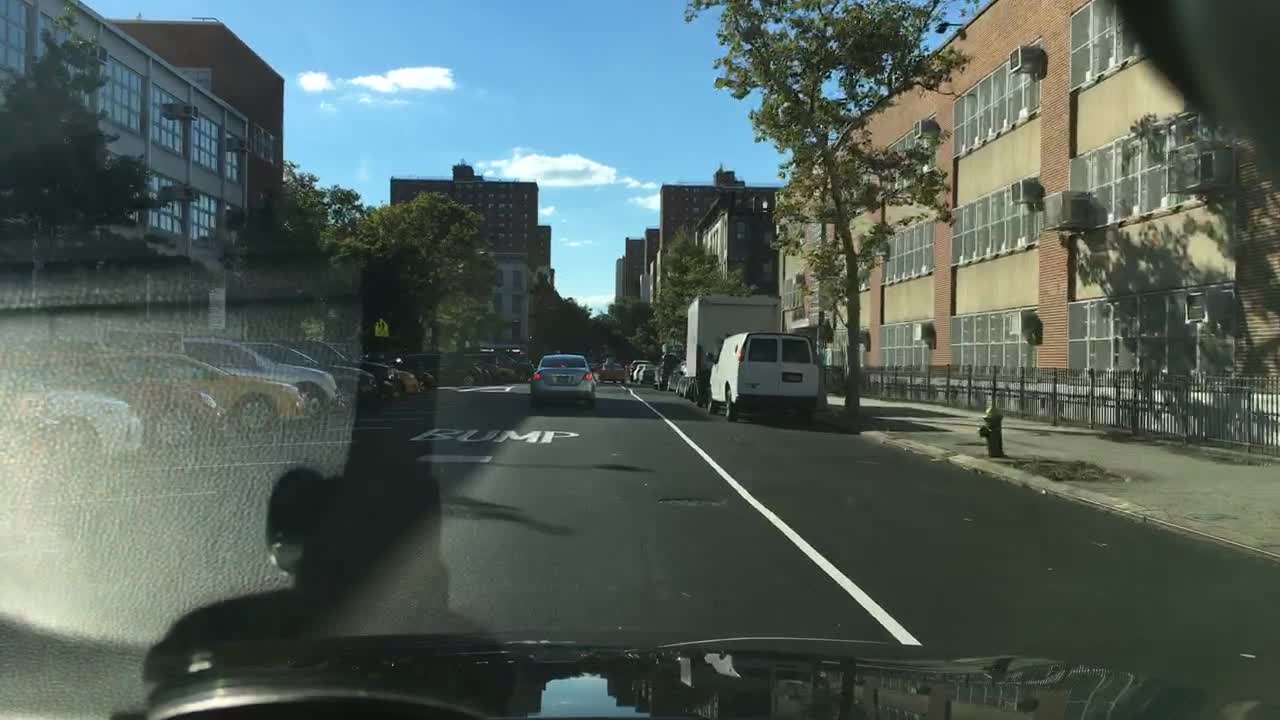

Predicted Label: clear


2024-04-04 03:44:51.088860: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-04 03:44:51.089122: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: GRID A100X-20C computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 20.00GiB deviceMemoryBandwidth: 1.41TiB/s
2024-04-04 03:44:51.089171: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-04-04 03:44:51.089205: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-04-04 03:44:51.089216: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2024-04-04 03:44:51.089225: I tensorflow/stream_executor/platform

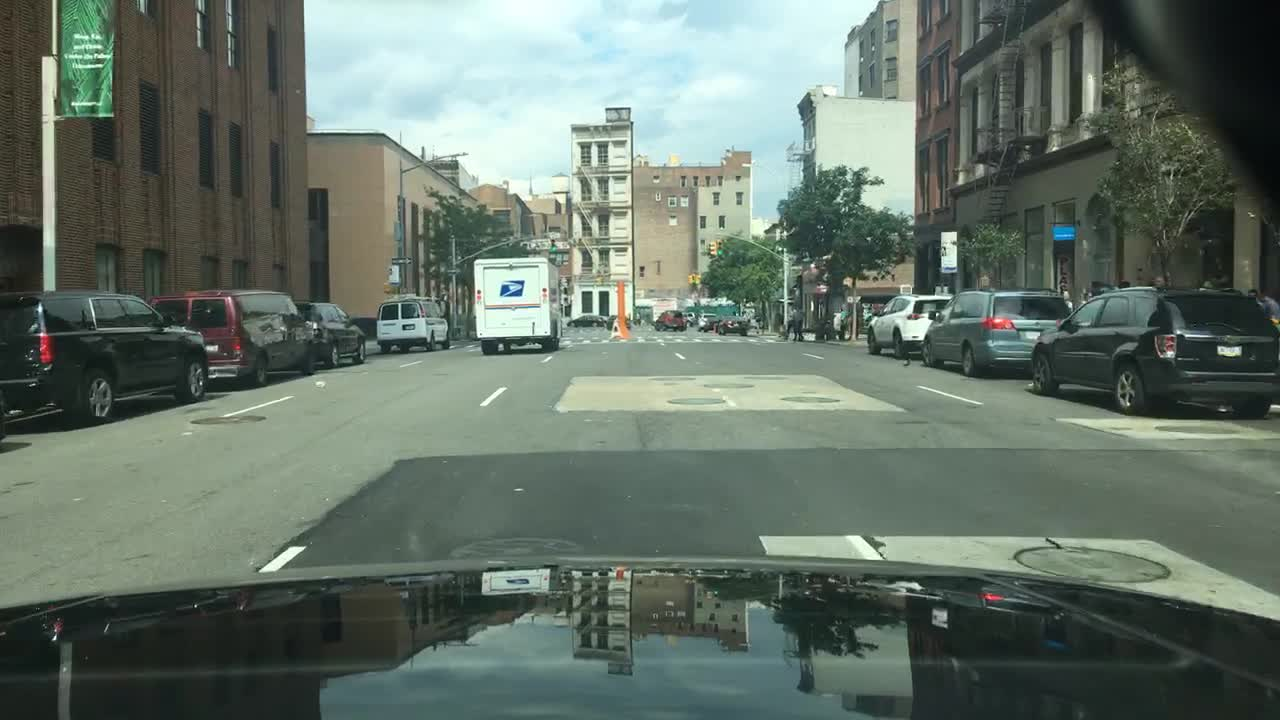

Predicted Label: clear


In [34]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder
import os
from IPython.display import display, Image
from random import sample


# Load the frozen model
model_path = "frozen_model_ResNet50_2.pb"

# Read the graph
with tf.io.gfile.GFile(model_path, 'rb') as f:
    graph_def = tf.compat.v1.GraphDef()
    graph_def.ParseFromString(f.read())

# Access the input and output details
input_tensor_name = None
output_tensor_name = None
for node in graph_def.node:
    if node.op == 'Placeholder':  # Assuming input tensor is a Placeholder node
        input_tensor_name = node.name
    elif node.op == 'Softmax':  # Assuming output tensor is a Softmax node
        output_tensor_name = node.name

# Function to perform inference on an image
def predict_weather(image_path):
    # Prepare test data
    test_data = np.expand_dims(tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224)), axis=0)
    test_data = test_data.astype(np.float32)

    # Start a TensorFlow session
    with tf.compat.v1.Graph().as_default() as graph:
        tf.import_graph_def(graph_def, name='')
        input_tensor = graph.get_tensor_by_name(input_tensor_name + ':0')
        output_tensor = graph.get_tensor_by_name(output_tensor_name + ':0')
        with tf.compat.v1.Session(graph=graph) as sess:
            # Run inference
            output_data = sess.run(output_tensor, feed_dict={input_tensor: test_data})

    return output_data

# Initialize lists to store true labels
true_labels = []

# Extract true labels from the filtered dataset
for _, weather in val_data_subset_filtered:
    true_labels.append(weather)

# Convert true labels to numpy array
true_labels = np.array(true_labels)

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit the label encoder with true labels
label_encoder.fit(true_labels)

# Get class names from label encoder
class_names = label_encoder.classes_

# Select 5 random images
random_images = sample(os.listdir("bdd100k/images/100k/test"), 5)

# Perform inference on each random image
for image_name in random_images:
    image_path = os.path.join("bdd100k/images/100k/test", image_name)
    predicted_probabilities = predict_weather(image_path)
    predicted_label_index = np.argmax(predicted_probabilities)
    predicted_label = class_names[predicted_label_index]
    
    # Display the image and its predicted label
    display(Image(filename=image_path))
    print("Predicted Label:", predicted_label)


# visualization of the CNN model

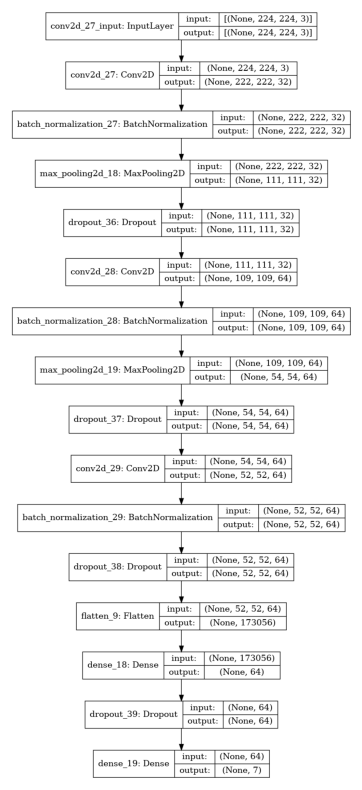

In [13]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

target_height, target_width = 224, 224

num_classes = 7
# Define your model with explicit input shape
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(target_height, target_width, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Define a function to visualize model architecture
def visualize_model(model):
    plt.figure(figsize=(10, 10))
    plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
    img = plt.imread('cnn_model.png')
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Visualize the model architecture
visualize_model(model)
